
SVM with linear kernel
Accuracy: 0.9667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


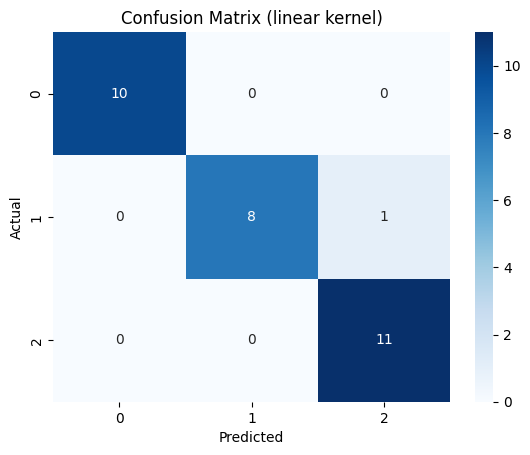


SVM with rbf kernel
Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


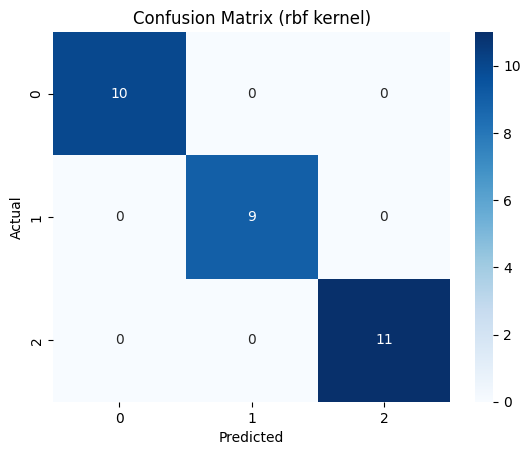

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IRIS dataset
iris_df = pd.read_csv('iris.csv')

# Encode labels if necessary
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate both linear and RBF kernels
for kernel in ['linear', 'rbf']:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nSVM with {kernel} kernel")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({kernel} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Letter Recognition - SVM (RBF Kernel)
Accuracy: 0.8582
Confusion Matrix:
[[140   1   0   0   0   0   2   0   0   1   1   0   0   0   0   0   0   1
    1   0   1   0   0   0   1   0]
 [  2 136   0   3   0   0   0   3   0   0   0   0   0   1   0   0   0   6
    1   0   0   1   0   0   0   0]
 [  0   0 117   0   3   0   4   2   0   0   6   0   0   0   3   0   0   0
    0   0   2   0   0   0   0   0]
 [  1   4   0 144   0   0   0   2   1   1   1   0   0   1   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   2   0 128   0   4   0   0   0   1   0   0   0   0   0   1   1
    2   1   0   0   0   0   0   0]
 [  0   0   0   0   1 126   3   1   2   1   0   0   0   0   0   0   0   0
    2   4   0   0   0   0   0   0]
 [  0   0   5   4   0   0 130   1   0   1   3   0   0   0   0   0   6   2
    2   0   0   4   2   0   0   0]
 [  1   3   1  14   1   2   0  83   0   1   6   0   1   2   7   1   3  13
    0   0   2   0   0   1   2   0]
 [  0   0   0   3   0   2   0   0 127   7   0   2   0 

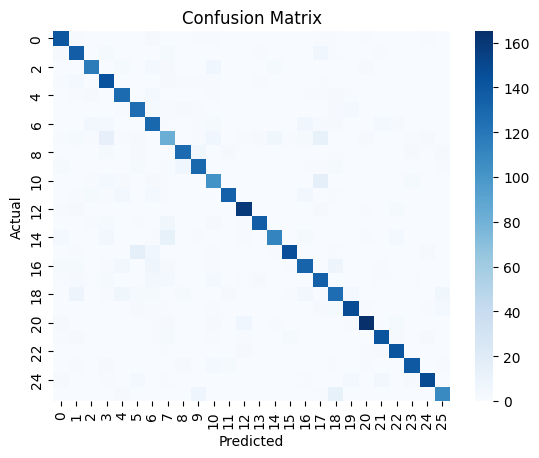

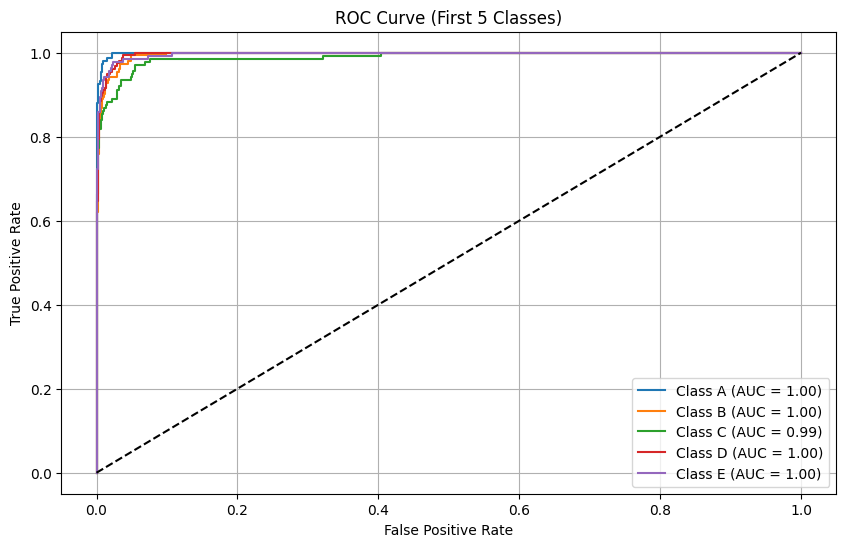

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Load the Letter Recognition dataset
letter_df = pd.read_csv('letter-recognition.csv')

X = letter_df.iloc[:, 1:]
y = letter_df.iloc[:, 0]

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Binarize for ROC
y_bin = label_binarize(y_enc, classes=range(len(le.classes_)))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Accuracy & confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nLetter Recognition - SVM (RBF Kernel)")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC & AUC for first few classes
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for first 5 classes
plt.figure(figsize=(10, 6))
for i in range(5):  # limit to first 5 for clarity
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (First 5 Classes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


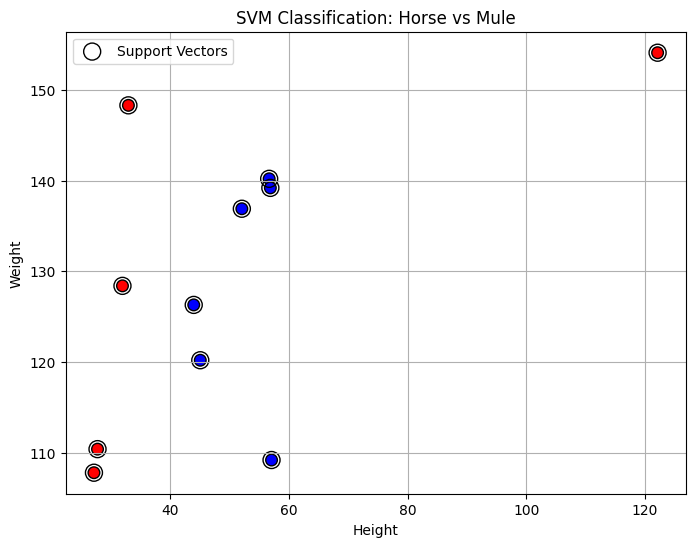

Accuracy: 0.9090909090909091
Support Vectors:
 [[ 44.  126.3]
 [ 52.1 136.9]
 [ 57.1 109.2]
 [ 45.1 120.2]
 [ 56.7 140.2]
 [ 56.9 139.2]
 [ 33.  148.3]
 [ 27.8 110.4]
 [ 27.2 107.8]
 [ 32.  128.4]
 [122.1 154.1]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Step 1: Create dataset
data = {
    "Height": [44.0, 52.1, 57.1, 33.0, 27.8, 27.2, 32.0, 45.1, 56.7, 56.9, 122.1],
    "Weight": [126.3, 136.9, 109.2, 148.3, 110.4, 107.8, 128.4, 120.2, 140.2, 139.2, 154.1],
    "Label":  ["Horse", "Horse", "Horse", "Mule", "Mule", "Mule", "Mule", "Horse", "Horse", "Horse", "Mule"]
}
df = pd.DataFrame(data)

# Step 2: Save CSV
df.to_csv("horses_mules_dataset.csv", index=False)

# Step 3: Load dataset
df = pd.read_csv("horses_mules_dataset.csv")

# Step 4: Preprocess data
X = df[["Height", "Weight"]].values
y = df["Label"].map({"Horse": 0, "Mule": 1}).values  # Convert to numeric

# Step 5: Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Step 6: Plot data and support vectors
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=70, edgecolors='k')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("SVM Classification: Horse vs Mule")

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Accuracy
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

# Step 8: Support Vectors
print("Support Vectors:\n", model.support_vectors_)